# <center> <font color='blue'> Matemática Para Data Science </font> </center>

## Estudo de Caso 07 

### Inferência  Bayesiana

A  ``Inferência  Bayesiana``, é  uma  abordagem  de  **inferência  estatística**,  que  se  baseia  na aplicação do ``teorema de Bayes`` para **atualizar a probabilidade de uma hipótese**, à medida que mais evidência ou informação, se tornam disponíveis.  

A ``abordagem bayesiana``, permite que se incorpore, explicitamente, o conhecimento prévio e as incertezas em sua modelagem, o que pode ser, uma grande vantagem em muitas situações em projetos de Data Science. 

A ``inferência bayesiana (IB)`` consiste na **avaliação de hipóteses pela máxima verossimilhança**, uma decorrência imediata da **fórmula de Bayes**

Neste Estudo de Caso, aplicaremos **Inferência Bayesiana** para **calcular a probabilidade** no diagnóstico de uma doença, implementando as operações matemáticas em linguagem Python, em especial, o cálculo da Integral.

A ``inferência bayesiana`` é uma abordagem de inferência estatística, que se baseia na aplicação do **teorema de Bayes**, para atualizar a probabilidade de uma hipótese, à medida que mais evidência ou informação se torna disponível. A ``inferência bayesiana`` é amplamente aplicada a area da saude

### Aqui está uma descrição de seus componentes principais e como ela funciona:

**Priori**: A priori é uma distribuição de probabilidade que expressa as crenças ou conhecimento prévio sobre um parâmetro ou hipótese antes de observar os dados. Por exemplo, se você estiver tentando estimar a média de uma distribuição, a priori pode ser uma distribuição normal centrada em uma média que você acredita ser razoável antes de ver qualquer dado.

**Verossimilhança**: A verossimilhança é uma função que descreve como os dados são gerados dado um parâmetro ou conjunto de parâmetros. É a probabilidade dos dados observados sob diferentes valores do parâmetro.

**Posteriori**: A posteriori é o que você está tentando calcular na inferência bayesiana. É a distribuição de probabilidade do parâmetro ou hipótese depois de ter visto os dados. É proporcional ao produto da verossimilhança e da priori.

**Evidência**: A evidência, ou marginal likelihood, é um fator de normalização que garante que a posteriori seja uma distribuição de probabilidade válida. É a probabilidade dos dados sob todas as possíveis hipóteses ou valores do parâmetro e é geralmente calculada como a integral da priori multiplicada pela verossimilhança em todos os valores possíveis do parâmetro.

A fórmula básica da inferência bayesiana, usando o teorema de Bayes, é:

![DSA](imagens/form3.png)

Onde:

- P(θ∣dados) é a posteriori.
- P(dados∣θ) é a verossimilhança.
- P(θ) é a priori.
- P(dados) é a evidência.

A ``inferência bayesiana`` tem muitas aplicações, em uma ampla variedade de campos, incluindo estatística, aprendizado de máquina, economia, ecologia e muito mais. A abordagem bayesiana permite que se incorpore, explicitamente, o conhecimento prévio e as incertezas em sua modelagem, o que pode ser uma grande vantagem em muitas situações. No entanto, também pode ser computacionalmente intensiva, especialmente para modelos complexos, com muitos parâmetros.

In [1]:
# Imports
import scipy
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.integrate import quad

## Implementando o Cálculo da Integral

A ``inferência bayesiana`` é um método de inferência estatística, em que o teorema de Bayes é usado, para atualizar a probabilidade de uma hipótese à medida que mais evidências ou informações se tornam disponíveis. Muitas vezes, isso envolve a integração da probabilidade conjunta, sobre todas as possíveis distribuições, de parâmetros desconhecidos.

 A **inferência estatística** é um processo de inferir características de uma população por meio da observação de uma amostra

Usaremos a ``inferência bayesiana`` para atualizar a nossa crença sobre, a média de uma distribuição normal, dada uma amostra de dados. Usaremos a distribuição normal como a ``verossimilhança`` e a ``distribuição normal`` como a **priori** para a média.

Neste exemplo, a **integral é calculada numericamente usando a função quad** para ``calcular a evidência``. A ``posteriori`` é então normalizada **dividindo** pela ``evidência``. O resultado é uma **distribuição de probabilidade posterior** para o **parâmetro desconhecido mu**, dada a amostra de dados.

In [2]:
# Definir a priori (vamos assumir uma distribuição normal com média 0 e desvio padrão 1)
def prior(mu):
    return norm.pdf(mu, 0, 1)

In [3]:
# Definir a verossimilhança (uma distribuição normal com desvio padrão conhecido de 1)
def likelihood(mu, data):
    return np.prod(norm.pdf(data, mu, 1))

In [4]:
# Definir a posteriori
def posterior(mu, data):
    return likelihood(mu, data) * prior(mu)

In [5]:
# Amostra de dados
data = np.array([2.3, 2.9, 3.1, 2.8, 3.0])

In [6]:
# Cálculo da evidência (integral da posteriori sobre todos os valores possíveis de mu)
evidence, _ = quad(lambda mu: posterior(mu, data), -np.inf, np.inf)

In [7]:
# Atualização bayesiana (normalização da posteriori)
def normalized_posterior(mu, data):
    return posterior(mu, data) / evidence

In [8]:
# Intervalo de mu para para criar o plot
mu_values = np.linspace(-2, 6, 1000)

In [9]:
# Cálculo da posteriori normalizada para diferentes valores de mu
posterior_values = [normalized_posterior(mu, data) for mu in mu_values]

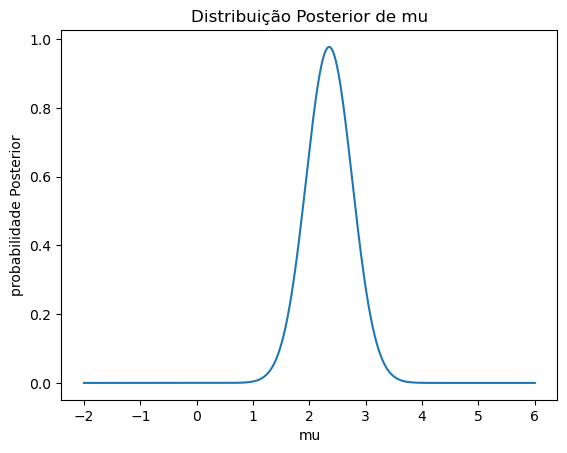

In [10]:
# Podemos então plotar a posteriori
plt.plot(mu_values, posterior_values)
plt.xlabel('mu')
plt.ylabel('probabilidade Posterior')
plt.title('Distribuição Posterior de mu')
plt.show()

## Diagnosticando Uma Doença com Inferência Bayesiana (Sem o Uso de Integral)

A inferência bayesiana pode ser aplicada em diversos campos. Vamos explorar um caso de uso comum na área médica: o diagnóstico de uma doença com base em um teste clínico.

Suponha que estamos considerando uma doença específica que afeta 1% da população. Temos um teste que pode diagnosticar essa doença, mas o teste não é perfeito. Ele tem uma taxa de verdadeiros positivos de 95% (se você tem a doença, o teste é positivo 95% do tempo) e uma taxa de falsos positivos de 5% (se você não tem a doença, o teste é positivo 5% do tempo).

Agora, vamos usar a inferência bayesiana para calcular a probabilidade de que uma pessoa que testou positivo realmente tenha a doença.


Priori (Probabilidade Prévia):

- P(D)=0.01: Probabilidade de ter a doença (1% da população).
- P(¬D)=0.99: Probabilidade de não ter a doença.

Verossimilhança (Likelihood):

- P(T∣D)=0.95: Probabilidade de teste positivo se tiver a doença (verdadeiros positivos).
- P(T∣¬D)=0.05: Probabilidade de teste positivo se não tiver a doença (falsos positivos).

Evidência (Marginal Likelihood):

A probabilidade total de teste positivo, considerando pessoas com a doença e sem a doença:

P(T)=P(T∣D)⋅P(D)+P(T∣¬D)⋅P(¬D)=0.95⋅0.01+0.05⋅0.99=0.059.

Posteriori (Probabilidade Posterior):

Usando o teorema de Bayes, podemos calcular a probabilidade de ter a doença dado um teste positivo:

- P(D∣T) =  P(T∣D)⋅P(D) / P(T) 
- P(D∣T) = 0.95 ⋅ 0.01 / 0.059 ≈ 0.161

Portanto, a probabilidade de que uma pessoa que testou positivo realmente tenha a doença é de aproximadamente 16,1%.

In [11]:
# Definindo as probabilidades

# P(D): Priori - Probabilidade de ter a doença
prob_doenca = 0.01  

# P(¬D): Priori - Probabilidade de não ter a doença
prob_nao_doenca = 1 - prob_doenca 

# P(T|D): Verossimilhança - Probabilidade de teste positivo se tiver a doença
prob_teste_positivo_doenca = 0.95  

# P(T|¬D): Verossimilhança - Probabilidade de teste positivo se não tiver a doença
prob_teste_positivo_nao_doenca = 0.05  

# Calculando a evidência: P(T) = P(T|D) * P(D) + P(T|¬D) * P(¬D)
prob_teste_positivo = (prob_teste_positivo_doenca * prob_doenca +
                       prob_teste_positivo_nao_doenca * prob_nao_doenca)

# Calculando a posteriori: P(D|T) = P(T|D) * P(D) / P(T)
prob_doenca_teste_positivo = (prob_teste_positivo_doenca * prob_doenca) / prob_teste_positivo

print(f"Probabilidade de ter a doença, dado um teste positivo: {prob_doenca_teste_positivo * 100:.2f}%")

Probabilidade de ter a doença, dado um teste positivo: 16.10%


## Diagnosticando Uma Doença com Inferência Bayesiana (Com o Uso de Integral)

No exemplo acima, a integral não foi necessária porque trabalhamos com distribuições discretas e cálculos diretos das probabilidades. No entanto, em muitos casos na inferência bayesiana, especialmente quando trabalhamos com distribuições contínuas, a integral é necessária para calcular a evidência.

Vamos ajustar o exemplo anterior para ilustrar o cálculo da integral. Suponha que não tenhamos uma probabilidade específica para a doença, mas sim uma distribuição contínua que represente nossa incerteza. Podemos usar a integral para somar as probabilidades contínuas.

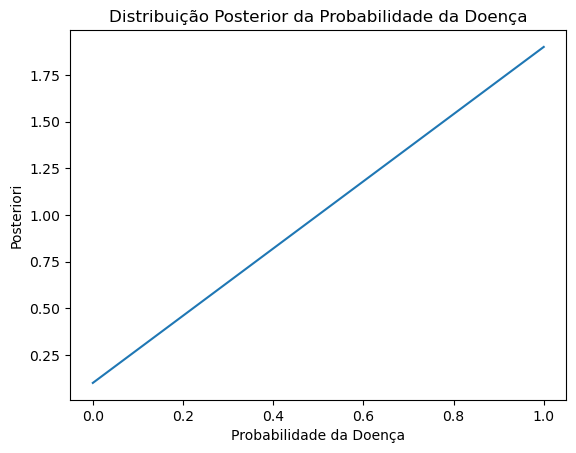

In [12]:
from scipy.integrate import quad

# Definir a priori como uma função (por exemplo, uma distribuição uniforme)
def prior(prob_doenca):
    return 1 if 0 <= prob_doenca <= 1 else 0

# Definir a verossimilhança como uma função
def likelihood(prob_doenca):
    return (prob_teste_positivo_doenca * prob_doenca +
            prob_teste_positivo_nao_doenca * (1 - prob_doenca))

# Calcular a evidência usando a integral da priori multiplicada pela verossimilhança
def evidence_integral(prob_doenca):
    return likelihood(prob_doenca) * prior(prob_doenca)

evidence, _ = quad(evidence_integral, 0, 1)

# Definir a posteriori como uma função
def posterior(prob_doenca):
    return likelihood(prob_doenca) * prior(prob_doenca) / evidence

# Agora você pode avaliar a posteriori para diferentes valores de prob_doenca
import numpy as np
import matplotlib.pyplot as plt

# Valores para avaliar a posteriori
valores_prob_doenca = np.linspace(0, 1, 1000)

# Calculando a posteriori para cada valor
valores_posteriori = [posterior(prob_doenca) for prob_doenca in valores_prob_doenca]

# Plotando a posteriori
plt.plot(valores_prob_doenca, valores_posteriori)
plt.xlabel('Probabilidade da Doença')
plt.ylabel('Posteriori')
plt.title('Distribuição Posterior da Probabilidade da Doença')
plt.show()

Esse código acima irá plotar a distribuição posterior da probabilidade da doença, mostrando como a crença se atualiza com base no resultado do teste. A distribuição posterior representa a sua crença atualizada sobre a probabilidade da doença, dado o resultado do teste, e reflete tanto o seu conhecimento prévio (a priori) quanto a informação fornecida pelo teste (a verossimilhança).

A forma da distribuição posterior depende da escolha da priori e da verossimilhança, e pode fornecer insights valiosos sobre a incerteza associada à probabilidade da doença. Isso pode ser útil em uma variedade de contextos clínicos ou de pesquisa onde você quer quantificar a incerteza sobre uma quantidade desconhecida com base nos dados observados.